In [18]:
from py2neo import Graph
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "neo4j+s://fa8d13fd.databases.neo4j.io"
user = "neo4j"
password = open("neo4j_passwd.secret").read().strip("\n")

In [53]:
def plot_degree_distribution(node_type, url, user, password, x_scale='linear', y_scale='linear',binning=None):    
    """
    Plots the degree distribution for a specific type of node in a Neo4j database.
    
    Parameters:
        node_type (str): The label of the nodes to consider. ANY for any node type
        url (str): The URL to the Neo4j database.
        user (str): The username for the Neo4j database.
        password (str): The password for the Neo4j database.
    """
    # Connect to Neo4j
    graph = Graph(url, auth=(user, password))

    # Query to get the degree of each node of the specified type
    if node_type != "ANY":
        query = f"""
        MATCH (n:{node_type})-[r]-()
        WITH n, COUNT(r) AS degree
        RETURN id(n) AS node_id, degree
        """
    else:
        query = f"""
        MATCH (n)-[r]-()
        WITH n, COUNT(r) AS degree
        RETURN id(n) AS node_id, degree
        """
    data = graph.run(query).data()
    
    # Convert data to DataFrame
    df = pd.DataFrame(data)
    
    # Generate the degree distribution
    degree_distribution = df['degree'].value_counts().sort_index()
    
    # Plotting
    if binning == 'log':
        # Apply log binning
        bins = np.logspace(np.log10(degree_distribution.index.min()), np.log10(degree_distribution.index.max()), num=10)
        bin_centers = 0.5 * (bins[1:] + bins[:-1])
        bin_counts = np.histogram(degree_distribution.index, bins=bins, weights=degree_distribution.values)[0]
        bin_centers_positive = []
        bin_counts_positive = []
        for i in range(len (bin_counts)):
            if bin_counts[i] != 0:
                bin_centers_positive.append(bin_centers[i])
                bin_counts_positive.append(bin_counts[i])
        
        plt.figure(figsize=(10, 5))
        plt.plot(bin_centers_positive, bin_counts_positive, color='red',label='applying log binning',marker='o')
        plt.scatter(degree_distribution.index, degree_distribution.values, color='blue',label='Original distribution')

    else:
        plt.figure(figsize=(10, 5))
        plt.scatter(degree_distribution.index, degree_distribution.values, color='blue')
    
    
    plt.title(f'Degree Distribution for {node_type} Nodes')
    plt.xlabel('Degree')
    plt.ylabel('Number of Nodes')
    plt.xscale(x_scale)  # Set x-axis scale
    plt.yscale(y_scale)  # Set y-axis scale
    plt.grid(True)
    plt.legend(loc="upper left")
    plt.show()

# Example usage


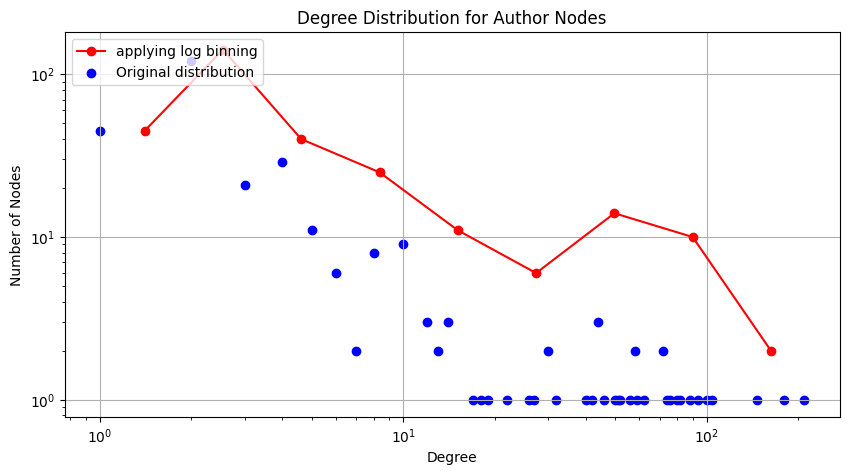

In [56]:
plot_degree_distribution("Author",url,user,password,x_scale='log',y_scale='log',binning='log')